<a href="https://colab.research.google.com/github/andersjes/Deep-Learning/blob/main/lab11__part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Visualizing and understanding ConvNets (part 1)
In this Lab we will be experimenting with techniques for visualizing and understanding ConvNets.

The first part (part 1) is about simple visualization techniques:

- **Visualizing layer activations**
 - Typically used to monitor training. As training progresses, the layer activations (i.e., feature maps) should become more local and sparse in nature.
- **Visualizing filters**
 - Typically also used to monitor training. As training progresses, the filters should become nice and smooth. Noisy filters indicate that the network is not done training.
- **Inspecting fully connected layers with K-NN**
 - The fully connected (FC) layers are where the magic happens in CNN classifiers. However, it is hard to visualize what these layers have learned. One common approach is run K Nearest Neighbours (K-NN) using the learned feature representation. That is, for a given test image, compare with the nearest neighbours. Do they look similar? In what way are they similar?
- **Visualization of FC layers using dimensionality reduction**
 - Another way to visualize what the FC layers have learned is by means of dimensionality reduction on the learned feature representation. Today, we will be looking at t-SNE.

Part 1 of the lab is divided into to sub-parts:

- In task 1 to 5 we will demonstrate how to apply the techniques mentioned above on a pre-trained CNN. Specifically, we will be looking at VGG16.

- In the final task, you will apply the techniques to monitor training of a custom CNN classifier on the MNIST dataset.

Much of part 1 will be a recap of [Lab 2](https://github.com/klaverhenrik/Deep-Learing-for-Visual-Recognition-2023/blob/main/Lab2_FeatureExtractionAndTransferLearning.ipynb).

**Before we start - remember to set runtime to GPU**

# Task 1 - Inference using pre-trained VGG16
This task serves to get us started. We will download a test image and run it through a pre-trained VGG16 network.

### Mount your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Download a test image
Lets download an image to work on:

In [ ]:
import urllib.request

url = "https://github.com/klaverhenrik/Deep-Learing-for-Visual-Recognition-2023/raw/main/data/cat.jpg"
urllib.request.urlretrieve(url,'/content/gdrive/My Drive/cat.jpg')

# Check that the file is in your Drive
!ls -l "/content/gdrive/My Drive/cat.jpg"

-rw------- 1 root root 156145 Oct 31 08:47 '/content/gdrive/My Drive/cat.jpg'


### Display test image

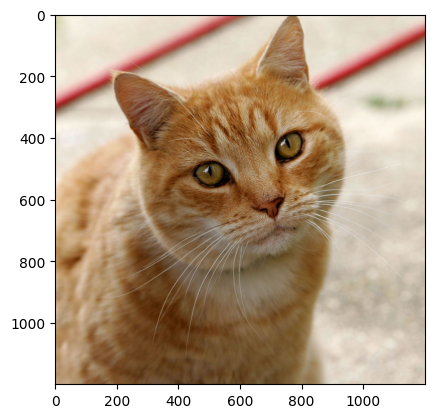

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image using OpenCV
img_path = '/content/gdrive/My Drive/cat.jpg'
img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
plt.imshow(img);

### Set up VGG16
First, let's download and instantiate a pre-trained VGG16 network including the top layers (i.e., the classifier):

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

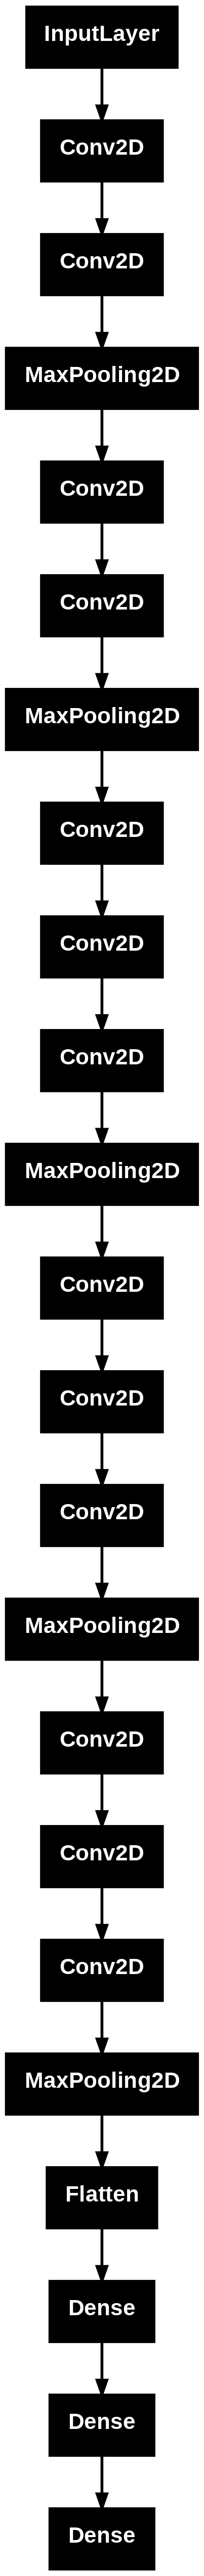

In [ ]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import plot_model

vgg16_full = VGG16(weights='imagenet',
                      include_top=True,
                      input_shape=(224, 224, 3))

# Uncomment one of the following to print network architecture:
vgg16_full.summary()
plot_model(vgg16_full)

### Preprocess the image
Recall that when using a pre-trained model, we have to make sure that we preprocess the input image in the same way as when the model was trained. In the case of VGG16, the correct preprocessing is to subtract a pre-calculated channel-wise mean given by `[103.939, 116.779, 123.68]`. Fortunately, Keras does that for us using the `preprocess_input` function.

np.min(img_data) 0.0
np.max(img_data) 255.0
np.min(img_preprocessed) -123.68
np.max(img_preprocessed) 133.061
img_preprocessed.shape (1, 224, 224, 3)


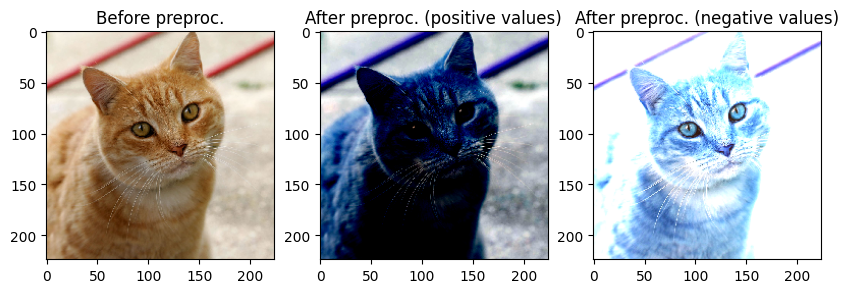

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0) # add extra batch dimension
img_preprocessed = preprocess_input(img_data.copy())

# Range before preprocessing
print('np.min(img_data)',np.min(img_data))
print('np.max(img_data)',np.max(img_data))

# Range after preprocessing
print('np.min(img_preprocessed)',np.min(img_preprocessed))
print('np.max(img_preprocessed)',np.max(img_preprocessed))

# Shapes
print('img_preprocessed.shape',img_preprocessed.shape)

plt.figure(figsize=(10,5))
plt.subplot(131); plt.imshow(img_data.squeeze()/255); plt.title('Before preproc.');
plt.subplot(132); plt.imshow(np.clip(img_preprocessed.squeeze()/128, a_min=0, a_max=1)); plt.title('After preproc. (positive values)');
plt.subplot(133); plt.imshow(np.clip(img_preprocessed.squeeze()/128, a_min=-1, a_max=0)+1); plt.title('After preproc. (negative values)');

### Classifiy test image
Let's run the classifier on the test image:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predictions.shape (1, 1000)
tiger_cat 0.41405526
Egyptian_cat 0.36328745
tabby 0.1271817
lynx 0.021943433
cup 0.008679083


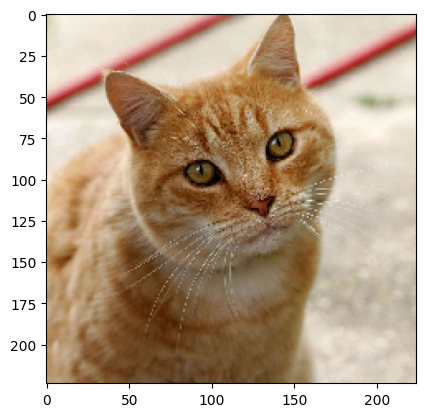

In [ ]:
from keras.applications.imagenet_utils import decode_predictions

# Predict class probabilities (model pre-trained on ImageNet, therefore 1000 classes)
predictions = vgg16_full.predict(img_preprocessed)
print('predictions.shape',predictions.shape)

# Get top-5 predictions
labels = decode_predictions(predictions,top=5)
[print(name,prob) for code, name, prob in labels[0]]
#print the image
plt.imshow(img);

Looks like the pre-trained VGG16 model predicts labels  associated with *cat*, as we would expect :-)

# Task 2 - Visualizing layer activations
Our goal is to visualize the layer activations or feature maps of all convolution layers. Show stats about convolution layers:

In [ ]:
for i, layer in enumerate(vgg16_full.layers):

  # check for convolutional layer
  layer_type = layer.__class__.__name__

  if 'Conv' not in layer_type:
    continue

  # get filter weights
  layer_name = layer.name
  input_shape = layer.input.shape
  output_shape = layer.output.shape
  filter_shape = layer.get_weights()[0].shape

  print(f"Layer {i} has name {layer_name}, input shape {input_shape}, filter shape {filter_shape}, and output shape {output_shape}")

Layer 1 has name block1_conv1, input shape (None, 224, 224, 3), filter shape (3, 3, 3, 64), and output shape (None, 224, 224, 64)
Layer 2 has name block1_conv2, input shape (None, 224, 224, 64), filter shape (3, 3, 64, 64), and output shape (None, 224, 224, 64)
Layer 4 has name block2_conv1, input shape (None, 112, 112, 64), filter shape (3, 3, 64, 128), and output shape (None, 112, 112, 128)
Layer 5 has name block2_conv2, input shape (None, 112, 112, 128), filter shape (3, 3, 128, 128), and output shape (None, 112, 112, 128)
Layer 7 has name block3_conv1, input shape (None, 56, 56, 128), filter shape (3, 3, 128, 256), and output shape (None, 56, 56, 256)
Layer 8 has name block3_conv2, input shape (None, 56, 56, 256), filter shape (3, 3, 256, 256), and output shape (None, 56, 56, 256)
Layer 9 has name block3_conv3, input shape (None, 56, 56, 256), filter shape (3, 3, 256, 256), and output shape (None, 56, 56, 256)
Layer 11 has name block4_conv1, input shape (None, 28, 28, 256), filter 

Note that you can get the layer names from the list above.

##Visualizing layer activations
Let's visualize the layer activations (i.e., feature maps) of the second conv layer in the first block:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
Shape of feature map: (14, 14, 512)


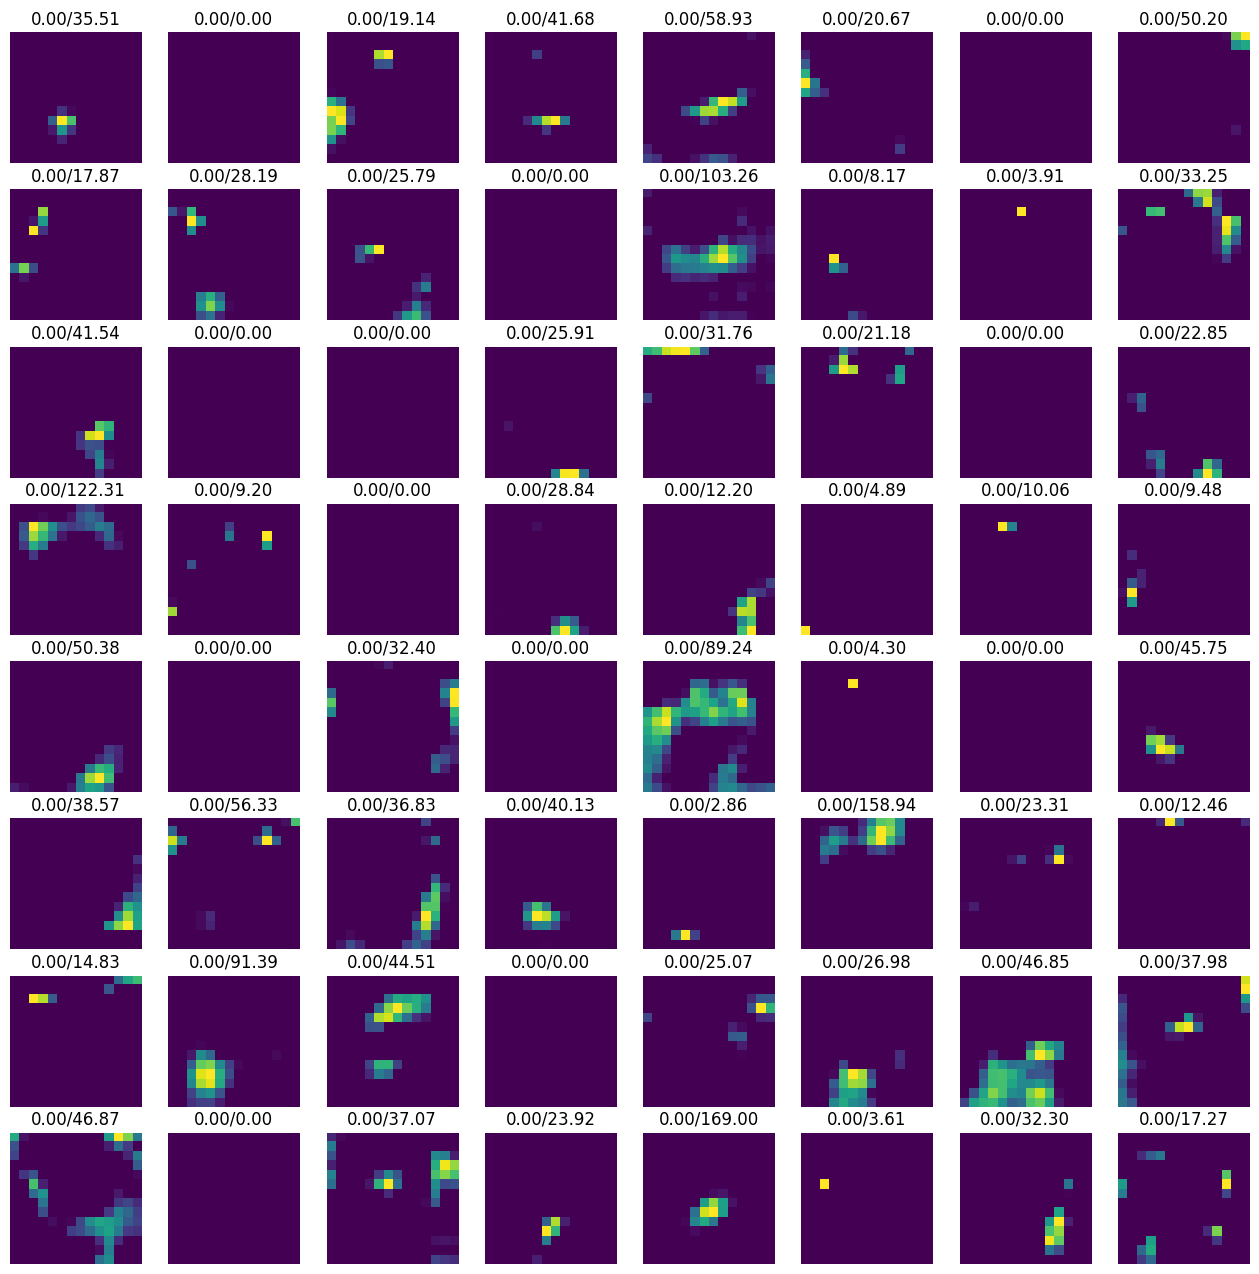

In [ ]:
from keras import Model
layer_name = 'block5_conv3'
dummy_model = Model(inputs=vgg16_full.input, outputs=vgg16_full.get_layer(layer_name).output)
out = dummy_model.predict(img_preprocessed)
out = out.squeeze()

num_channels = np.min([64,out.shape[-1]])
height_width = out.shape[0]
num_cols = 8
num_rows = int(num_channels / num_cols)

print('Shape of feature map: ' + str(out.shape))

plt.figure(figsize=(16,2*num_rows))
for i in range(num_channels):
  f = out[:,:,i]
  plt.subplot(num_rows,num_cols,i+1)
  plt.imshow(f)
  plt.axis('off')
  plt.title("{0:.2f}".format(f.min()) + "/" + "{0:.2f}".format(f.max())) # Print min/max intensity

Visualization of layer activations is typically used to monitor the training process. As training progresses, the layer activations (i.e., feature maps) should become more local and sparse in nature. We can also use layer activations to get an understanding of what features the network has learned to look for - at least in the first few layers. As me move deeper and deeper into the network, it becomes increasingly harder to interpret the layer activations.

###Questions
Using layer activation visualization, answer the following questions:
1. What type of features are detected in the `block1_conv2` layer?

bigger edges and patterns
2. Are the features detected in the `block5_conv3` local and sparse, as we would expect?

small details

# Task 3 - Visualizing filters
Filter visualization is typically also used to monitor training. As training progresses, the filters should become nice and smooth. On the other hand, noisy filters indicate that the network is not done training.

Note that each filter can have many channels that in general have to be displayed separately. However, for the first convolution layer, we know that there are only three channels (RGB). So in this case, we can display all channels of the filters simultaneously using an RGB images.

Since the gradients during backpropagation tend to be smallest in the first layer of the network, it us usually sufficient to inspect the filters of the first layer in order to verify that the network is done training (again, what we don't want to see is noisy filters).

Let's visualize the filters of the first convolution layer of VGG16:

TypeError: Invalid shape (3, 3, 512) for image data

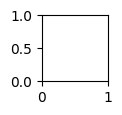

In [ ]:
layer_name = 'block1_conv1'
layer = vgg16_full.get_layer(layer_name)
filters = layer.get_weights()

plt.figure(figsize=(8,10))
for i in range(64):
  f = filters[0][:,:,:,i]

  # Normalize to range 0 ... 1
  f -= f.min()
  f /= f.max()

  plt.subplot(8,8,i+1)
  plt.imshow(f)
  plt.axis('off')
  plt.title(str(i))

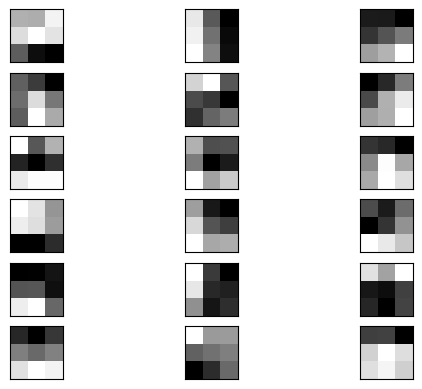

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

layer_name = 'block5_conv3'
layer = vgg16_full.get_layer(layer_name)
filters, biases = layer.get_weights()

# filters shape: (3, 3, 512, 512)
# biases shape: (512,)

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
plt.show()

###Questions
1. Do the filters look smooth and noise-free?

this is what we ar looking for:
Edges and Lines: Filters that detect edges of different orientations (horizontal, vertical, diagonal) and lines of varying thicknesses. These are fundamental building blocks for recognizing more complex shapes.

Color Blobs: Filters that are sensitive to specific colors or color combinations. This could be represented by filters with strong activations in certain color channels (e.g., red, green, blue).

Gradients: Filters that detect gradual changes in intensity or color. These can help identify textures and subtle variations within an image.

Gabor-like Filters: Filters that resemble Gabor functions, which are wavelets with a specific frequency and orientation. They are often used to model the receptive fields of neurons in the visual cortex and can be effective in detecting edges, textures, and other patterns.

i this case i think it is some what noise free
2. How would you visualize the filters of the last conv layer (`block5_conv3`)? Hint: There are 512 filters in the last layer, and each filter furthermore has 512 channels. Do you see the challenge in displaying the filters?

Get Filter Weights: Obtain the filter weights and biases from the desired layer (block5_conv3).
Normalization: Normalize the filter values to a range of 0-1 for better visualization.
Iterate and Visualize: Loop through a subset of filters and their channels (e.g., the first 6 filters). For each filter, display each of its channels (3 in this case) separately as grayscale images. This helps visualize the different patterns captured by each channel of the filter.

# Task 4 - Inspecting fully connected layers with K-NN
In a simple CNN classifier, the objective of the fully connected (FC) layers is to take the results of the convolution/pooling process and use them to classify the image into a label.

One way to inspect an FC layer is as follows:

1. Choose an FC layer. For VGG, FC layers output a 1000 or 4096-dimensional feature vector for each image.
2. Run the network on many images and collect the feature vectors.
3. Run K Nearest Neighbours (KNN).
4. For a given test image, compare with nearest neighbours. Do they look similar? In what way are they similar?

In this task we will be looking af the second FC layer of VGG16.

### Download more images
We need more images from multiple classes. We will be using the same approach as in [Lab 2](https://github.com/klaverhenrik/Deep-Learing-for-Visual-Recognition-2023/blob/main/Lab2_FeatureExtractionAndTransferLearning.ipynb) to download some example images:

In [ ]:
!pip install fastbook --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00


In [ ]:
from fastbook import *
from pathlib import Path

root = '/content/gdrive/My Drive/' # Don't change this
#root = '/content/' # Alternative solution if mounting your Drive doesn't work
data_dirname = 'data' # Change as you like
p = Path(root + data_dirname)
p.mkdir(exist_ok=True) # should "/content/gdrive/My Drive/data"

**IMPORTANT:** In case you still have data folders from Lab 2 with overlapping names **or** the download fails and you have to clear the data directory, **uncomment and run** these commands (remember to prefix with !):

```
!rm -rf "/content/gdrive/My Drive/data"
!mkdir "/content/gdrive/My Drive/data" # make new empty data directory
```



In [ ]:
classes = ['bird','cat','cow','dog','horse','mouse','pig','sheep']
max_images = 100
count = 0
for idx, category in enumerate(classes):
  print(category)
  folder = category
  dest = p/folder
  dest.mkdir(parents=True, exist_ok=True)
  urls = search_images_ddg(category, max_images=max_images)
  download_images(dest,urls=urls,max_pics=max_images)

bird
cat
cow
dog
horse
mouse
pig
sheep


Verify images (remove files that cannot be opened)

In [ ]:
import os
for c in classes:
  print(c)
  filelist = [x for x in (p/c).iterdir() if x.is_file()]
  for f in filelist:
    img = cv2.imread(str(f))
    if img is None:
      print(f'Failed to open {f}. Deleting file')
      os.remove(str(f))

bird
Failed to open /content/gdrive/My Drive/data/bird/d3800950-ee49-407f-9337-5a118576b5e4.jpeg. Deleting file
Failed to open /content/gdrive/My Drive/data/bird/624a3f56-8a59-4b03-b5be-d799969cb41c.jpg. Deleting file
Failed to open /content/gdrive/My Drive/data/bird/30781e37-9419-46c6-8ede-edd5f826a95e.jpg. Deleting file
cat
Failed to open /content/gdrive/My Drive/data/cat/0da38b7c-5047-4363-9c65-78ea03ec30f1.gif. Deleting file
Failed to open /content/gdrive/My Drive/data/cat/34a5e277-87aa-48bd-80bf-2f4a75fa2df2.jpg. Deleting file
Failed to open /content/gdrive/My Drive/data/cat/1cd45d3b-57ba-4e68-b950-79667f18570e.jpg. Deleting file
Failed to open /content/gdrive/My Drive/data/cat/7e525066-b0e3-49a9-8e6e-a30261d02bc8.gif. Deleting file
cow
Failed to open /content/gdrive/My Drive/data/cow/61cbeb47-51b5-4f13-b444-45c27b83e57b.jpg. Deleting file
Failed to open /content/gdrive/My Drive/data/cow/bc4a67a2-222c-4d43-a711-4153445df529.jpg. Deleting file
Failed to open /content/gdrive/My Driv

### Set up data generator
Make data generator that runs through all images:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
generator = datagen.flow_from_directory(str(p), # this is where you specify the path to the main data folder
                                        target_size=(224,224),
                                        color_mode='rgb',
                                        batch_size=batch_size,
                                        class_mode='categorical',
                                        shuffle=True)

Found 689 images belonging to 8 classes.


Verify that the generator classes and your classes are in the same order:

In [ ]:
from sklearn import neighbors

def extract_features(generator):
  generator.reset()
  raw_pixel_features_list = []
  vgg16_features_list = []
  labels_list = []

  for raw_pixels, labels in generator:  # Iterate using a for loop
      # Run through MobileNet encoder
      vgg16_features = model.predict(raw_pixels)

      # Vectorize images
      bs, h, w, c = raw_pixels.shape
      raw_pixels = np.reshape(raw_pixels, (bs, h * w * c))  # Vectorize

      # Convert one-hot encoding to class index
      labels = np.argmax(labels, axis=1)

      # Save in lists
      for i in range(bs):
          raw_pixel_features_list.append(raw_pixels[i])
          vgg16_features_list.append(vgg16_features[i])
          labels_list.append(labels[i])

      if generator.batch_index == 0:  # Check if generator has looped once
          break  # Stop after one loop

  # Convert lists to numpy arrays
  raw_pixel_features = np.asarray(raw_pixel_features_list)
  vgg16_features = np.asarray(vgg16_features_list)
  labels = np.asarray(labels_list)

  return raw_pixel_features, vgg16_features, labels

features_raw, features_net, labels = extract_features(generator)

# Train K-NN classifier on network features (features_net) with k = 10
nbrs = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(features_net)

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


RuntimeError: pybind11::error_already_set: MISMATCH of original and normalized active exception types: ORIGINAL InternalError REPLACED BY KeyboardInterrupt: <EMPTY MESSAGE>

At:
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/errors_impl.py(462): __init__
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/execute.py(53): quick_execute
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/context.py(1552): call_function
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(251): call_flat
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/atomic_function.py(216): call_preflattened
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/concrete_function.py(1322): _call_flat
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/tracing_compilation.py(139): call_function
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(878): _call
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py(833): __call__
  /usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py(150): error_handler
  /usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py(508): predict
  /usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py(117): error_handler
  <ipython-input-28-b5c008f04a14>(11): extract_features
  <ipython-input-28-b5c008f04a14>(36): <cell line: 36>
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3553): run_code
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3473): run_ast_nodes
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3257): run_cell_async
  /usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py(78): _pseudo_sync_runner
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(3030): _run_cell
  /usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py(2975): run_cell
  /usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py(539): run_cell
  /usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py(302): do_execute
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(539): execute_request
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(261): dispatch_shell
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(234): wrapper
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py(361): process_one
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(786): run
  /usr/local/lib/python3.10/dist-packages/tornado/gen.py(825): inner
  /usr/local/lib/python3.10/dist-packages/tornado/ioloop.py(738): _run_callback
  /usr/local/lib/python3.10/dist-packages/tornado/ioloop.py(685): <lambda>
  /usr/lib/python3.10/asyncio/events.py(80): _run
  /usr/lib/python3.10/asyncio/base_events.py(1909): _run_once
  /usr/lib/python3.10/asyncio/base_events.py(603): run_forever
  /usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py(195): start
  /usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py(619): start
  /usr/local/lib/python3.10/dist-packages/traitlets/config/application.py(992): launch_instance
  /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py(37): <module>
  /usr/lib/python3.10/runpy.py(86): _run_code
  /usr/lib/python3.10/runpy.py(196): _run_module_as_main


In [ ]:
print(generator.class_indices)
print(classes)

{'bird': 0, 'cat': 1, 'cow': 2, 'dog': 3, 'horse': 4, 'mouse': 5, 'pig': 6, 'sheep': 7}
['bird', 'cat', 'cow', 'dog', 'horse', 'mouse', 'pig', 'sheep']


### Modify model to output features from second FC layer
Here we are slightly modifying the model. How (in what way)?


In [ ]:
from keras import activations
from keras.models import load_model

# New model that outputs features of second FC layer (fc2)
model = Model(inputs=vgg16_full.input, outputs=vgg16_full.get_layer('fc2').output)

features = model.predict(img_preprocessed)
print('Feature dimensions: ' + str(features.shape))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
Feature dimensions: (1, 4096)


### Run K-NN
Extract 4096-dimensional feature vectors from second FC layer and run K Nearest Neighbors:

**NOTE:** Code block sometimes crashes. Just run it, until it doesn't crash...

In [ ]:
from sklearn import neighbors

def extract_features(generator):
  generator.reset()
  raw_pixel_features_list = []
  vgg16_features_list = []
  labels_list = []
  batch_index = 0
  while batch_index <= generator.batch_index:
    # Load mini-batch
    raw_pixels, labels = generator.next()

    # Run through MobileNet encoder
    vgg16_features = model.predict(raw_pixels) # This is where we apply the CNN

    # Vectorize images
    bs,h,w,c = raw_pixels.shape
    raw_pixels = np.reshape(raw_pixels,(bs,h*w*c)) # vectorize

    # Convert one-hot encoding to class index
    labels = np.argmax(labels,axis=1)

    # Save in lists
    for i in range(bs):
      raw_pixel_features_list.append(raw_pixels[i])
      vgg16_features_list.append(vgg16_features[i])
      labels_list.append(labels[i])

    batch_index = batch_index + 1

  # Convert lists to numpy arrays
  raw_pixel_features = np.asarray(raw_pixel_features_list)
  vgg16_features = np.asarray(vgg16_features_list)
  labels = np.asarray(labels_list)

  return raw_pixel_features, vgg16_features, labels

features_raw, features_net, labels = extract_features(generator)

# Train K-NN classifier on network features (features_net) with k = 10
nbrs = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(features_net)

AttributeError: 'DirectoryIterator' object has no attribute 'next'

###chat hjalp med koden

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn import neighbors

def extract_features_batched(generator, model, batch_size=32):
    """Extracts features in batches to reduce memory usage."""
    features_net = []
    labels = []

    for batch_x, batch_y in generator:
        batch_features = model.predict(batch_x)
        features_net.extend(batch_features)
        labels.extend(np.argmax(batch_y, axis=1))  # Get class indices

        if generator.batch_index == 0:  # Check for loop completion
            break  # Stop after one epoch

    return np.array(features_net), np.array(labels)

# Assuming you have your generator, model, and classes defined

# Extract features in batches
features_net, labels = extract_features_batched(generator, model)

# Train K-NN classifier
nbrs = neighbors.NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(features_net)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-28-b5c008f04a14>", line 36, in <cell line: 36>

  File "<ipython-input-28-b5c008f04a14>", line 11, in extract_features

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 508, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 208, in one_step_on_data_distributed

ptxas exited with non-zero error code 2, output: : If the error message indicates that a file could not be written, please verify that sufficient filesystem space is provided.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_data_distributed_1891]

Count number of examples within each class (just a test - numbers should be fairly equal):

In [ ]:
for i in range(len(classes)):
  print(i,len(np.where(labels==i)[0]))

### Display results
Pick a random image and display its 10 closest neighbours:

In [ ]:
# Pick test image
filelist = [x for x in (p/classes[np.random.randint(0,len(classes)-1)]).iterdir() if x.is_file()]
img_path = filelist[np.random.randint(0,len(filelist)-1)]
print(f"File path: {img_path}")

# Load and preprocess
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

# Feed test image through network to get feature vector
X = model.predict(img_data)
X = np.reshape(X,(1,4096)) # Vectorize

# Get indicies of 10 nearest neighbours (+ distances)
distances, indices = nbrs.kneighbors(X)

# Display nearest neighbours
print('Input/query image:')
plt.figure()
im = (img_data[0,:,:,:]+128)/255
b,g,r = cv2.split(im)
rgb = cv2.merge((r,g,b))
plt.imshow(np.clip(rgb,0,1,out=rgb))
plt.imshow(rgb)
plt.axis('off')
plt.show()
print('10 nearest neighbours:')
plt.figure(figsize=(12,6))
for i in range(10):
  plt.subplot(2,5,i+1)
  im = (np.reshape(features_raw[indices[0][i],:],(224,224,3)) + 128) / 255
  b,g,r = cv2.split(im)
  rgb = cv2.merge((r,g,b))
  plt.imshow(np.clip(rgb,0,1,out=rgb))
  plt.axis('off')

###Questions
Recall that our goal is to investigate if the second FC layer has learned useful features. Run the above code block a few times and answer these questions:

1. What should we be looking for? In other words, what kind of similarity do you expect to see?
2. Are you happy with the results?

# Task 5 - Visualization of FC layers using dimensionality reduction
Another way to visualize the learned feature representation of an FC layer is to reduce the dimensionality of the feature vectors from, say 4096 to 2 dimensions (so that we can plot the features in 2D). Here, we will be using t-Distributed Stochastic Neighbouring Entities (t-SNE).

t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding”.
As a result, **observations that are close in the high-dimensional space will also be close in the low-dimensional space**.

### Run t-SNE on extracted feature vectors

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Same as above, but using neural net representation
X = features_net
y = labels
print(X.shape, y.shape)

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['y'] = df['y'].apply(lambda i: classes[int(i)])
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

rndperm = np.random.permutation(df.shape[0])

N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1]
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("bright", len(classes)),
    data=df_subset,
    legend="full",
    alpha=0.3
)

NameError: name 'features_net' is not defined

###Questions
1. What can you say about the the topology of the learned representation?
2. Are any of the classes clearly separated from the others?
3. Which classes are likely confused more often than others?

# Task 6 - Try it on MNIST
I recommend that you solve Lab 11 part 2 before solving this one.

Your task is to apply what you have learned above on a custom CNN classifier trained on MNIST.

### Download dataset

In [ ]:
from __future__ import print_function
from keras.datasets import mnist
from keras import backend as K

num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Pre-process inputs
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class indices to one-hot vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Set up custom CNN classifier
Note that the model is defined using a function call. Use this function if you need to re-initialize the model (i.e., reset all weights to random values).

Also note that the layers are given names like `conv1`, `pool1`, etc. You can use these names to access filters and feature maps of different layers.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers import Input

def get_model():
  inputs = Input(shape=(28, 28, 1),name='input')

  # Encoder (convolutional base)
  x = Conv2D(8, kernel_size=(5, 5), activation='relu', name='conv1')(inputs)
  x = MaxPooling2D((2, 2),name='pool1')(x)
  x = Conv2D(16, kernel_size=(3, 3), activation='relu',name='conv2')(x)
  x = MaxPooling2D((2, 2),name='pool2')(x)
  x = Conv2D(32, kernel_size=(3, 3), activation='relu',name='conv3')(x)
  encoded = Flatten(name='flat')(x)

  # Decoder (2 fully connected layers)
  x = Dense(64, activation='relu',name='fc1')(encoded)
  x = Dropout(0.5,name='drop')(x)
  predictions = Dense(num_classes,activation='softmax',name='prediction')(x)

  # This creates a callable model that includes the Input layer and the prediction layer
  model = Model(inputs=inputs, outputs=predictions)

  return model

model = get_model()
model.summary()

### Run inference on a random test image
**Note** that we haven't trained the model yet.

In [ ]:
N = x_test.shape[0]
ix = np.random.randint(N)
test_image = x_test[ix]
test_image = np.expand_dims(test_image, axis=0)
prediction = model.predict(test_image)[0]
print('Class probabilities: ' + str(prediction))
plt.figure()
plt.imshow(test_image.squeeze(),cmap='gray')
plt.axis('off');

### Task
1. Display the filters of the first convolution layer (`conv1`).
2. Run the test image through the network (like above) and display the activations of the last convolution layer (`conv3`).
3. Optionally, repeat for multiple test images.

**Tip:** Define functions for both, as it will make the remaining sub-tasks easier.

### Questions
1. How would you characterize the filters? Are they smooth? Are they noisy?
2. How would you characterize the layer activations? Are they local and sparse?
3. Do you observe the same overall pattern in layer activations for different test images?

### Train the model for 1 epoch
Train the model for 1 epoch and display the filters and activations again.

In [ ]:
batch_size = 128
epochs = 1

# Compile the model before training
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit model
history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Display filters and layer activations again.

### Question
Now that we have trained the model, the filters and activations are not completely random anymore. Answer the same questions as before:

1. How would you characterize the filters? Are they smooth? Are they noisy?
2. How would you characterize the layer activations? Are they local and sparse?
3. Do you observe the same overall pattern in layer activations for different test images?

### Train for longer
Now, train for 20 epochs (or more if you want).

Now that we have trained the model for more epochs, the filters/weights should have converged.

### Question
Now that we have trained the model, the filters and activations are not completely random anymore. Answer the same questions as before:

1. How would you characterize the filters? Are they smooth? Are they noisy?
2. How would you characterize the layer activations? Are they local and sparse?

### Optional task
Try to visualize the FC layers using K-NN or t-SNE

# Optional task (advanced) - Implement saliency via occlusion
I recommend that you solve Lab 10 part 2 before solving this one.

Read about "Saliency via occlusion" in the slides of lecture 11. Then implement the technique for VGG16 and test it on the first cat image.

I used a window size of 56 pixels and a stride of 8 in my solution.

Here is some code to get you started:

In [ ]:
img_path = '/content/gdrive/My Drive/cat.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_preprocessed = preprocess_input(img_data.copy())
print(img_preprocessed.shape)

predictions = vgg16_full.predict(img_preprocessed)

labels = decode_predictions(predictions,top=1)
[print(name,prob) for code, name, prob in labels[0]]

class_index = np.argmax(predictions)
print(class_index)

prob = predictions[0,class_index]
print(prob)